## 6. Интерполяция параметрически заданной функции

Рассмотрим задачу поиска интерполирующей кривой по точкам
$p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$).
Предположим, что форму этой кривой
нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать
для кривой в форме буквы S и др. (функция была бы неоднозначной).

Рассмотрим два набора данных $(i, x_i)$ и $(i, y_i)$ ($i=1,\dots,n$).
Их можно независимо интерполировать функциями $f(t)$, $g(t)$. Тогда кривая,
заданная параметрически,
$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$
будет интерполировать наши данные.

Другой способ – интерполировать данные $(\sum_{i=1}^{i-1} d_i, x_i)$
и $(\sum_{i=1}^{i-1} d_i, y_i)$ ($i=1,\dots,n$), где $d_i$ – расстояние между точками
$p_i$ и $p_{i+1}$.


## Решение.
Нарисуем букву S (или любую другую) и измерим координаты $8$ точек $p_i$,
лежащих на ней. Интерполируем эти данные обоими способами, описанными выше
 * кубическим интерполяетом;
 * кубическим сплайном.
 
Изобразим их и сравним результаты.

### Начальные данные:

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
%matplotlib inline

### Постановка:
Введем в массив для x и y координаты точек для того, чтобы изобразить на графике букву S.

In [154]:
x = np.array([2.25, 3, 4.5, 6, 6.75, 6, 4.5, 3, 2.25, 3, 4.5, 6, 6.75])
y = np.array([2.5, 1.5, 1, 1.5, 2.75, 4, 4.5, 5, 6.25, 7.5, 8, 7.5, 6])

Для построение самого графика требуется добавить еще некоторые массивы. Количество заданных точек и функция для построения нашего графика.

In [155]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])
lnp = np.linspace(1, 13, 500)

### Первый способ:
Теперь сможем интерполировать заданные нами данные по условию "Кубическим интерполянтом"

In [156]:
q = np.polyfit(arr, x, 3)
e = np.polyfit(arr, y, 3)
xk = np.polyval(q, lnp)
yk = np.polyval(e, lnp)

Изобразим это на графике кубическим интерполяетом:

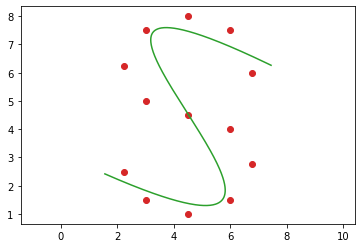

In [157]:
plt.plot(x, y, 'o', color='tab:red')
plt.plot(xk, yk, color="tab:green")
plt.axis('equal')
pass

Выполним интерполяцию кубическим сплайном:

In [158]:
q = interpolate.interp1d(arr, x, kind='cubic')
e = interpolate.interp1d(arr, y, kind='cubic')
xk = q(lnp)
yk = e(lnp)

Изобразим на графике кубическим сплайном:

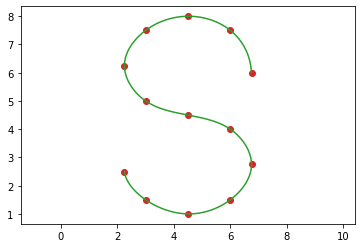

In [159]:
plt.plot(x, y, 'o', color='tab:red')
plt.plot(xk, yk, color="tab:green")
plt.axis('equal')
pass

### Второй способ:
Интерполируем данные, где $d_i$ – расстояние между точками
$p_i$ и $p_{i+1}$.

In [160]:
di = np.array([])
for i in range(len(x)-1):
    rast = np.sqrt((x[i + 1] - x[i]) ** 2 + (y[i + 1] - y[i]) ** 2)
    di = np.append(di, np.array(rast))

Обозначим суммы расстояний между заданными точками $d_i$ и зададим новый linspace по результату данных.

In [161]:
ddi = np.array([])
for j in range(len(x)):
    summ = 0
    for i in range(j):
        summ += di[i]
    ddi = np.append(ddi, summ)
ddi

array([ 0.        ,  1.25      ,  2.83113883,  4.41227766,  5.87001563,
        7.32775361,  8.90889244, 10.49003127, 11.94776924, 13.40550722,
       14.98664605, 16.56778488, 18.24483586])

По выведенным данным зададим linspace:

In [162]:
lnp = np.linspace(0, 18, 500)

По тем же действиям, что и в первом способе, интерполируем данные "кубическим интерполянтом":

In [163]:
q = np.polyfit(ddi, x, 3)
e = np.polyfit(ddi, y, 3)
xk = np.polyval(q, lnp)
yk = np.polyval(e, lnp)

Изобразим на графике кубический интерполянт:

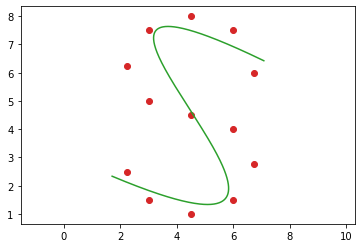

In [164]:
plt.plot(x, y, 'o', color='tab:red')
plt.plot(xk, yk, color="tab:green")
plt.axis('equal')
pass

Выполним интерполяцию кубическим сплайном:

In [165]:
q = interpolate.interp1d(ddi, x, kind='cubic')
e = interpolate.interp1d(ddi, y, kind='cubic')
xk = q(lnp)
yk = e(lnp)

Изобразим на графике кубическим сплайном:

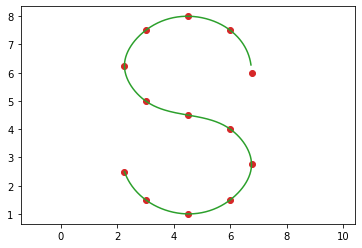

In [166]:
plt.plot(x, y, 'o', color='tab:red')
plt.plot(xk, yk, color="tab:green")
plt.axis('equal')
pass

## Сравнение полученных результатов:

По полученным результатам можно заметить, что эти два способа практически схожи. При выводе графиков на экран мы можем увидеть это. При этом, интерполяции:
*Кубический интерполянт* и *Кубический сплайн* имеют разное построение на графике. *Кубический интерполянт* вырисовывает букву S независимо отдаленных от точек. *Кубический сплайн* как раз таки вырисовывает S по заданным точкам на графике.
Имеются отличия в конечной точки зарисовки графика в *Кубическом сплайне* во втором случае. В первом случае реализация происходит полноценно.